In [1]:
# import required librarys
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [111]:
df = pd.read_excel("Spare parts.xlsx")

In [74]:
#some initial insfections
df.head()

,Material,Material Description,SLoc,Area,MvT,Doc_Date,Qty.,Amount
0,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-14,15.0,28.12
1,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-08,10.0,18.74
2,15,Plain Washer Din125 A10&5 A2,M2SH,KARAD,261,2016-08-12,8.0,15.00
3,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-08-06,10.0,18.75
4,15,Plain Washer Din125 A10&5 A2,M4P3,C'SHWAR STR,261,2016-08-06,10.0,18.75


In [65]:
df.shape

(7560, 8)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Material              7560 non-null   object        
 1   Material Description  7560 non-null   object        
 2   SLoc                  7560 non-null   object        
 3   Area                  7560 non-null   object        
 4   MvT                   7560 non-null   int64         
 5   Doc_Date              7560 non-null   datetime64[ns]
 6   Qty.                  7560 non-null   float64       
 7   Amount                7560 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 472.6+ KB


In [41]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7555    False
7556    False
7557    False
7558    False
7559    False
Length: 7560, dtype: bool

In [10]:
df.duplicated().sum()

1137

In [16]:
duplicates = df[df.duplicated]

In [18]:
duplicates.head()

,Material,Material Description,SLoc,Area,MvT,Doc_Date,Qty.,Amount
24,15,Plain Washer Din125 A10&5 A2,M1GU,KARAD,261,2015-10-23,15.0,28.12
72,69,HT-washer DIN6916 21 tZn,M2SH,KARAD,261,2015-10-12,6.0,45.46
110,123,Hexagon Head Scr. Iso4017 M08X020 A2,M1MH,KARAD,261,2015-11-05,1.0,6.26
111,123,Hexagon Head Scr. Iso4017 M08X020 A2,M1MH,KARAD,261,2015-11-05,1.0,6.26
112,123,Hexagon Head Scr. Iso4017 M08X020 A2,M1MH,KARAD,261,2015-11-05,1.0,6.26


In [44]:
duplicates.tail()

,Material,Material Description,SLoc,Area,MvT,Doc_Date,Qty.,Amount
7468,94938,PCB capacitor w.vina tech cell wwil mfg,M4P3,C'SHWAR STR,261,2016-09-29,2.0,23834.36
7491,N89005,Grease Distributor 100mm³ 3xadjust.Vogel,M4P4,C'SHWAR STR,261,2016-04-29,2.0,0.00
7537,N89005,Grease Distributor 100mm³ 3xadjust.Vogel,M4BH,Area1,262,2015-09-09,-1.0,0.00
7538,N89005,Grease Distributor 100mm³ 3xadjust.Vogel,M4BH,KARAD,261,2015-09-09,1.0,0.00
7554,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,262,2016-08-13,-1.0,0.00


In [12]:
df.isnull().sum()

Material                0
Material Description    0
SLoc                    0
Area                    0
MvT                     0
Doc_Date                0
Qty.                    0
Amount                  0
dtype: int64

In [34]:
df.describe()

,MvT,Doc_Date,Qty.,Amount
count,7560.000000,7560,7560.000000,7560.000000
mean,261.159524,2016-03-23 06:09:42.857142784,7.414204,2412.590180
min,261.000000,2015-03-13 00:00:00,-22.000000,-814249.250000
25%,261.000000,2015-12-02 00:00:00,1.000000,12.495000
50%,261.000000,2016-03-13 00:00:00,1.000000,289.140000
75%,261.000000,2016-07-24 00:00:00,5.000000,2752.980000
max,262.000000,2016-09-30 00:00:00,2445.000000,929475.000000
std,0.366188,NaN,58.814166,30971.572849


In [112]:
# Preprocessing data
df.columns = df.columns.str.strip().str.replace('.', '').str.replace('_', '')
df['DocDate'] = pd.to_datetime(data['DocDate'], errors='coerce')
df = df.dropna(subset=['DocDate'])

In [98]:
df

,Material,Material Description,SLoc,Area,MvT,DocDate,Qty,Amount
0,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-14,15.0,28.12
1,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-08,10.0,18.74
2,15,Plain Washer Din125 A10&5 A2,M2SH,KARAD,261,2016-08-12,8.0,15.00
3,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-08-06,10.0,18.75
4,15,Plain Washer Din125 A10&5 A2,M4P3,C'SHWAR STR,261,2016-08-06,10.0,18.75
...,...,...,...,...,...,...,...,...
7555,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,KARAD,261,2015-12-03,1.0,0.00
7556,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,262,2015-10-19,-1.0,0.00
7557,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4P3,Area2,262,2015-09-16,-1.0,0.00
7558,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,KARAD,261,2015-09-11,1.0,0.00


In [113]:
# Aggregate data by Material and YearMonth
df['YearMonth'] = df['DocDate'].dt.to_period('M')
agg_data = df.groupby(['Material', 'YearMonth'])['Qty'].sum().reset_index()
agg_data['YearMonth'] = agg_data['YearMonth'].dt.to_timestamp()

In [114]:
# Pivot the data for time series analysis
pivot_data = agg_data.pivot(index='YearMonth', columns='Material', values='Qty').fillna(0)

In [103]:
pivot_data.head()

Material,15,16,17,18,19,20,21,26,60,68,...,94167,94172,94196,94310,94547,94617,94895,94938,N89005,N89042
YearMonth,,,,,,,,,,,,,,,,,,,,,
2015-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2015-09-01,40.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.0,-1.0
2015-10-01,51.0,0.0,40.0,0.0,29.0,4.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
2015-11-01,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [115]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define a threshold to identify high-consumption parts (e.g., top 20% based on mean demand)
high_consumption_threshold = pivot_data.mean(axis=0).quantile(0.8)
high_consumption_parts = pivot_data.columns[pivot_data.mean(axis=0) >= high_consumption_threshold]


In [116]:
# Forecast for each high-consumption part
forecasts = {}

for material in high_consumption_parts:
    print(f"Forecasting for Material: {material}")
    series = pivot_data[material]

Forecasting for Material: 15
Forecasting for Material: 17
Forecasting for Material: 18
Forecasting for Material: 19
Forecasting for Material: 20
Forecasting for Material: 68
Forecasting for Material: 86
Forecasting for Material: 96
Forecasting for Material: 103
Forecasting for Material: 125
Forecasting for Material: 128
Forecasting for Material: 131
Forecasting for Material: 132
Forecasting for Material: 135
Forecasting for Material: 136
Forecasting for Material: 138
Forecasting for Material: 139
Forecasting for Material: 142
Forecasting for Material: 144
Forecasting for Material: 145
Forecasting for Material: 162
Forecasting for Material: 394
Forecasting for Material: 395
Forecasting for Material: 397
Forecasting for Material: 398
Forecasting for Material: 399
Forecasting for Material: 405
Forecasting for Material: 611
Forecasting for Material: 618
Forecasting for Material: 620
Forecasting for Material: 621
Forecasting for Material: 629
Forecasting for Material: 759
Forecasting for Ma

In [150]:
# Fit ARIMA model (adjust p, d, q as needed)
model = ARIMA(series, order=(3, 3, 3))  # Use grid search for better parameter selection
fit = model.fit()

C:\Users\adity\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  war

In [151]:
# Forecast next 6 months
forecast = fit.get_forecast(steps=6)
forecast_index = pd.date_range(start=series.index[-1], periods=6, freq='M')
forecast_series = forecast.predicted_mean
forecast_series.index = forecast_index
forecasts[material] = forecast_series
forecast_series

C:\Users\adity\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\adity\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\adity\AppData\Local\Temp\ipykernel_3528\31878926.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=series.index[-1], periods=6, freq='M')


2016-09-30    4.806173
2016-10-31    6.656730
2016-11-30    6.162578
2016-12-31    7.573202
2017-01-31    7.182118
2017-02-28    8.147457
Freq: ME, Name: predicted_mean, dtype: float64

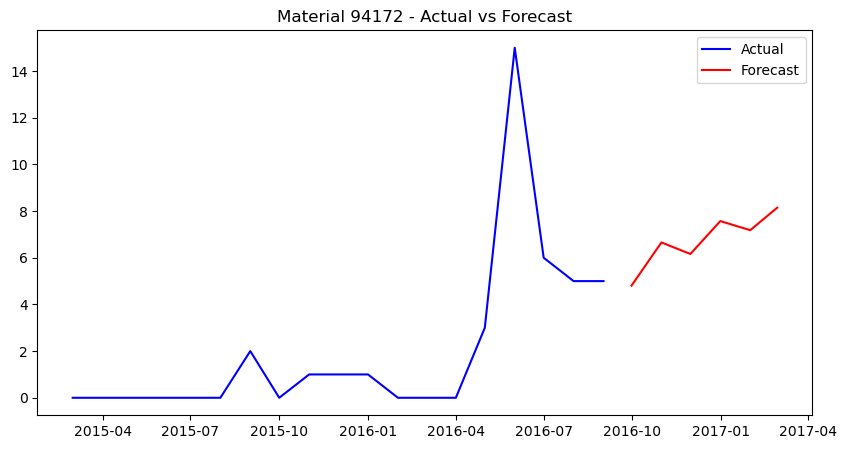

In [152]:
 # Plot actual vs forecast for visualization
plt.figure(figsize=(10, 5))
plt.plot(series, label='Actual', color='blue')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title(f'Material {material} - Actual vs Forecast')
plt.legend()
plt.show()

In [153]:
# Display forecasted values for all high-consumption parts
for material, forecast in forecasts.items():
    print(f"\nMaterial: {material}\n{forecast}")


Material: 94172
2016-09-30    4.806173
2016-10-31    6.656730
2016-11-30    6.162578
2016-12-31    7.573202
2017-01-31    7.182118
2017-02-28    8.147457
Freq: ME, Name: predicted_mean, dtype: float64


In [ ]:
Trend Observation:
The forecasted consumption values for Material 94172 show an increasing trend over time:
From 4.81 units in September 2016 to 8.15 units in February 2017.
This suggests a consistent rise in demand, which could indicate:
Seasonal demand patterns.
Growth in usage or consumption over time.